# Apply a Box-Cox transformation to a Field

In this example we are going to modify a Field through a Box-Cox transformation.

In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
# Define a process
myIndices= ot.Indices([10,5])
myMesher =ot.IntervalMesher(myIndices)
myInterval = ot.Interval([0.0, 0.0], [2.0, 1.0])
myMesh = myMesher.build(myInterval)
amplitude = [1.0]
scale = [0.2, 0.2]
myCovModel = ot.ExponentialModel(scale, amplitude)
myXproc = ot.GaussianProcess(myCovModel, myMesh)
g = ot.SymbolicFunction(['x1'],  ['exp(x1)'])
myDynTransform = ot.ValueFunction(g, myMesh)
myXtProcess = ot.CompositeProcess(myDynTransform, myXproc)

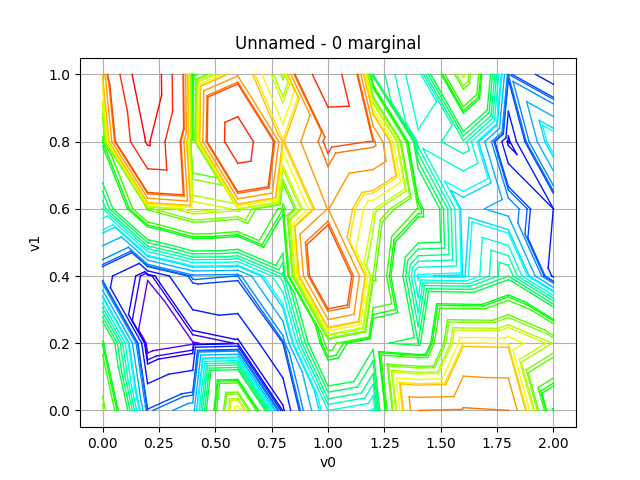

In [3]:
# Draw a field
field = myXtProcess.getRealization()
field.drawMarginal(0)

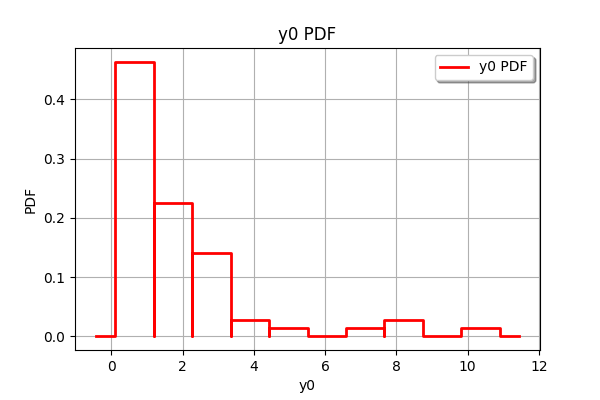

In [4]:
# Draw values
marginal = ot.HistogramFactory().build(field.getValues())
marginal.drawPDF()

In [5]:
# Build the transformed field through Box-Cox
myModelTransform = ot.BoxCoxFactory().build(field)
myStabilizedField = myModelTransform(field)

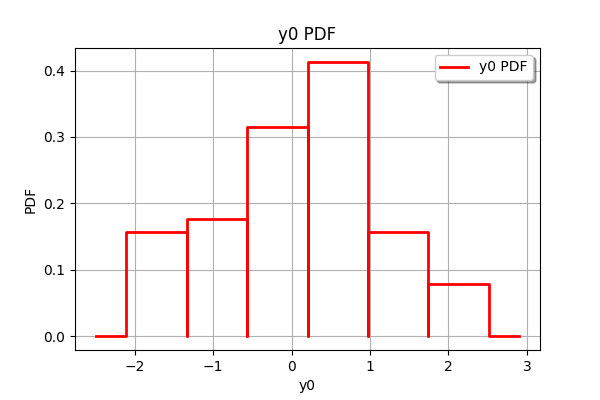

In [6]:
# Draw values
marginal = ot.HistogramFactory().build(myStabilizedField.getValues())
marginal.drawPDF()